# Đồ án cuối kỳ NMKHDL

Câu hỏi cần trả lời

## Phần 1: Thu thập dữ liệu

In [2]:
import requests
from bs4 import BeautifulSoup

### Get tất cả các link laptop

In [29]:
all_brands_links = [
    'https://phongvu.vn/laptop-asus-1058.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=',
    'https://phongvu.vn/laptop-acer-1059.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=',
    'https://phongvu.vn/laptop-Dell-1056.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=',
    'https://phongvu.vn/macbook-1061.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=',
    'https://phongvu.vn/laptop-hp-1057.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=',
    'https://phongvu.vn/laptop-lenovo-1060.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=',
    'https://phongvu.vn/laptop-lg-1268.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=',
    'https://phongvu.vn/laptop-msi-1081.cat?pv_source=homepage&pv_medium=de-megamenu-text&page='
]

items = [] # danh sách các link laptop

# parse để lấy link
for brand in all_brands_links:
    for page in range(1, 50):
        pv_laptop_url = brand + str(page)
        while True:
            try:
                html_text = requests.get(pv_laptop_url).text
                break
            except:
                continue
        tree = BeautifulSoup(html_text, 'html.parser')
        found = tree.find_all('a', {'class': 'css-1rhapru'})
        if len(found) == 0:
            break
        items = items + found
    print(brand)

https://phongvu.vn/laptop-asus-1058.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=
https://phongvu.vn/laptop-acer-1059.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=
https://phongvu.vn/laptop-Dell-1056.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=
https://phongvu.vn/macbook-1061.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=
https://phongvu.vn/laptop-hp-1057.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=
https://phongvu.vn/laptop-lenovo-1060.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=
https://phongvu.vn/laptop-lg-1268.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=
https://phongvu.vn/laptop-msi-1081.cat?pv_source=homepage&pv_medium=de-megamenu-text&page=


In [30]:
len(items)

794

Tổng cộng get được 794 link laptop.

In [31]:
# xem qua các link
for item in items[:5]:
    print(item['href'])

/may-tinh-xach-tay-laptop-asus-d509da-ej800t-amd-ryzen-3-3250u-bac-s200900077.html
/may-tinh-xach-tay-laptop-asus-vivobook-flip-tm420ia-ec155-amd-ryzen-3-4300u-xam-s201104484.html
/may-tinh-xach-tay-laptop-asus-tuf-gaming-fa506iial012t-amd-ryzen-5-4600h-xam-s200500682.html
/may-tinh-xach-tay-laptop-asus-vivobook-x509ja-ej427t-i3-1005g1-bac-s201100788.html
/may-tinh-xach-tay-laptop-asus-tuf-gaming-fx506li-hn039t-i5-10300h-xam-s201100021.html


In [34]:
import csv

### Parse từng link và ghi ra file csv

File dữ liệu: `data.csv`

In [35]:
fields = {'Thương hiệu': 'Brand', 'Bảo hành': 'Warranty', 'Màu sắc': 'Color', 'Series laptop': 'SeriesLaptop', 'Part-number': 'PartNum', 'Thế hệ CPU': 'CPUgen', 'CPU': 'CPU', 'Chip đồ họa': 'GraphicChip', 'RAM': 'RAM', 'Màn hình': 'Screen', 'Lưu trữ': 'Storage', 'Số cổng lưu trữ tối đa': 'MaxStoPortNum', 'Kiểu khe M.2 hỗ trợ': 'SupportM2', 'Cổng xuất hình': 'OutVideoPort', 'Cổng kết nối': 'ConnectPort', 'Kết nối không dây': 'Wireless', 'Bàn phím': 'Keyboard', 'Hệ điều hành': 'OS', 'Kích thước': 'Size', 'Pin': 'Pin', 'Khối lượng': 'Weight', 'Đèn LED trên máy': 'LED', 'Phụ kiện đi kèm': 'Accessories', 'Bảo mật': 'Security', 'Ổ đĩa quang': 'OptDrive', 'Tính năng': 'Feature'}

fieldnames = ['SKU', 'Title', 'Price', 'Brand', 'Warranty', 'Color', 'SeriesLaptop', 'PartNum', 'CPUgen', 'CPU', 'GraphicChip', 'RAM', 'Screen', 'Storage', 'MaxStoPortNum', 'SupportM2', 'OutVideoPort', 'ConnectPort', 'Wireless', 'Keyboard', 'OS', 'Size', 'Pin', 'Weight', 'LED', 'Accessories', 'Security', 'OptDrive', 'Feature']

In [36]:
file = open('data.csv', 'w', encoding='utf-8')
file_writer = csv.DictWriter(file, fieldnames=fieldnames)
file_writer.writeheader()

count = 0
for item in items:
    count += 1
    url = 'https://phongvu.vn' + item['href']
    while True:
        try:
            laptop_html_text = requests.get(url).text
            break
        except:
            continue
    laptop_html_tree = BeautifulSoup(laptop_html_text, 'html.parser')
    title = laptop_html_tree.find('div', {'class': 'css-1jpdzyd'}).text
    sku = laptop_html_tree.find('div', {'class': 'css-5nimvs'}).text.split(' ')[-1]
    price = laptop_html_tree.find('span', {'class': 'css-3725in'}).text[:-1]
    values = {'SKU': sku, 'Title': title, 'Price': price} 
    for i in laptop_html_tree.find_all('div', {'class': 'css-7j9rw7'}):
        name = i.find('span', {'class': 'css-6z2lgz'}).text.strip(' ')
        if name in fields:
            values[fields[name]] = i.find('div', {'class': 'css-111s35w'}).text.strip(' ')
    file_writer.writerow(values)
    if count % 10 == 0:
        print(count)
file.close()

10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790


## Phần 2: Khám phá dữ liệu (để tách các tập)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns # seaborn là thư viện được xây trên matplotlib, giúp việc visualization đỡ khổ hơn
import pandas as pd
import numpy as np

In [2]:
data_df = pd.read_csv('data.csv', index_col='SKU') # Dùng mã SKU của sản phẩm để làm index
data_df.head()

,Title,Price,Brand,Warranty,Color,SeriesLaptop,PartNum,CPUgen,CPU,GraphicChip,...,Keyboard,OS,Size,Pin,Weight,LED,Accessories,Security,OptDrive,Feature
SKU,,,,,,,,,,,,,,,,,,,,,
200900077,"Laptop ASUS D509DA EJ800T ( 15.6"" Full HD/AMD ...",10.190.000,ASUS,24,Bạc,NaN,EJ800T,"Ryzen 3 , AMD Ryzen thế hệ thứ 3",AMD Ryzen 3 3250U ( 2.6 GHz - 3.5 GHz / 4MB / ...,AMD Radeon Graphics,...,"thường , có phím số , không đèn",Windows 10 Home 64-bit,36 x 23.5 x 2.29 cm,2 cell Pin liền,1.9 kg,không đèn,NaN,NaN,NaN,NaN
201104484,"Laptop ASUS Vivobook Flip TM420IA EC155 ( 14"" ...",13.490.000,ASUS,24,Xám,VivoBook,EC155,"Ryzen 3 , AMD Ryzen thế hệ thứ 3",AMD Ryzen 3 4300U ( 2.7 GHz - 3.7 GHz / 4MB / ...,AMD Radeon Graphics,...,"thường , không phím số , LED",Windows 10 Home 64-bit,32.4 x 22 x 1.82 cm,"3 cell 42 Wh , Pin liền",1.5 kg,không đèn,NaN,NaN,NaN,Numberpad ảo tích hợp trên touchpad
200500682,"Laptop ASUS TUF Gaming FA506II AL012T ( 15.6"" ...",21.990.000,ASUS,24,Xám,TUF Gaming,AL012T,"Ryzen 5 , AMD Ryzen thế hệ thứ 4",AMD Ryzen 5 4600H ( 3.0 GHz - 4.0 GHz / 8MB / ...,NVIDIA GeForce GTX 1650Ti 4GB GDDR6 / AMD Ra...,...,"thường , có phím số , RGB",Windows 10 Home SL 64-bit,35.98 x 25.6 x 2.28 cm,"3 cell 48 Wh , Pin liền",2 kg,không đèn,NaN,NaN,NaN,NaN
201100788,"Laptop ASUS Vivobook X509JA EJ427T ( 15.6"" Ful...",11.190.000,ASUS,24,Bạc,VivoBook,EJ427T,"Core i3 , Intel Core thế hệ thứ 10",Intel Core i3-1005G1 ( 1.2 GHz - 3.4 GHz / 4MB...,Intel UHD Graphics,...,"thường , có phím số , không đèn",Windows 10 Home SL 64-bit,36.02 x 23.49 x 2.29 cm,"2 cell 32 Wh , Pin liền",1.7 kg,không đèn,NaN,Vân tay,NaN,NaN
201100021,"Laptop ASUS TUF Gaming FX506LI HN039T ( 15.6"" ...",23.490.000,ASUS,24,Xám,TUF Gaming,HN039T,"Core i5 , Intel Celeron 1000",Intel Core i5-10300H ( 2.5 GHz - 4.5 GHz / 8MB...,NVIDIA GeForce GTX 1650Ti 4GB GDDR6 / Intel ...,...,"thường , có phím số , RGB",Windows 10 Home 64-bit,35.9 x 25.6 x 2.47 cm,"3 cell 48 Wh , Pin liền",2.3 kg,không đèn,"Adapter, Sticker, Sách HDSD, Sổ BH",NaN,NaN,NaN


### Ý nghĩa các cột

In [3]:
with open('description.txt', 'r') as f:
    print(f.read())

nothing


In [4]:
data_df.shape

(794, 28)

In [5]:
data_df.index.duplicated().sum()

0

Không có dòng trùng.

In [8]:
# Cột dùng làm output là Price
data_df['Price'].dtype

dtype('O')

Cột output có dữ liệu dạng Object nên chúng ta cần chuyển về dạng số để phù hợp với bài toán hồi quy.

In [5]:
data_df['Price'].isna().sum()

0

Cột output không có giá trị thiếu

## Phần 3: Tiền xử lý (tách các tập)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [7]:
# Chuyển cột Price về dạng numerical
data_df.Price = pd.to_numeric(data_df.Price.str.replace('.', ''), errors='coerce')
data_df.Price.dtype

### Bây giờ ta sẽ thực hiện bước tiền xử lý là tách tập tập kiểm tra, validation và tập test ra theo tỉ lệ: 70%:15%:15%.

In [9]:
# Tách X và y
y_sr = data_df["Price"] # sr là viết tắt của series
X_df = data_df.drop("Price", axis=1)

In [10]:
# Tách tập huấn luyện, tập validation và tập test theo tỉ lệ 70%:15%:15%
# Tách dữ liệu thu thập thành 2 tập: tập huấn luyện và tập other (validation và test) theo tỉ lệ 70%:30%
train_X_df, other_X_df, train_y_sr, other_y_sr = train_test_split(X_df, y_sr, test_size=0.3, random_state=0)

# Tách tập other (validation và test) thành 2 tập: tập validation và tập test theo tỉ lệ 50%:50% 
val_X_df, test_X_df, val_y_sr, test_y_sr = train_test_split(other_X_df, other_y_sr, test_size=0.5, random_state=0)

In [11]:
train_X_df.shape, val_X_df.shape, test_X_df.shape, train_y_sr.shape, val_y_sr.shape, test_y_sr.shape

((555, 27), (119, 27), (120, 27), (555,), (119,), (120,))

## Phần 4: Khám phá dữ liệu (Tập huấn luyện)

### Mỗi cột input hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [12]:
train_X_df.dtypes

Title            object
Brand            object
Warranty          int64
Color            object
SeriesLaptop     object
PartNum          object
CPUgen           object
CPU              object
GraphicChip      object
RAM              object
Screen           object
Storage          object
MaxStoPortNum    object
SupportM2        object
OutVideoPort     object
ConnectPort      object
Wireless         object
Keyboard         object
OS               object
Size             object
Pin              object
Weight           object
LED              object
Accessories      object
Security         object
OptDrive         object
Feature          object
dtype: object

Có vẻ nhiều cột đều có kiểu dữ liệu chưa phù hợp, ta sẽ xử lý sau.

### Với mỗi cột input có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

In [13]:
num_cols = ['Warranty', 'SKU']

cat_cols = list(set(train_X_df.columns) - set(num_cols))
df = train_X_df[cat_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
df.agg([missing_ratio, num_values, value_ratios])

,ConnectPort,SeriesLaptop,OutVideoPort,Color,SupportM2,Wireless,Weight,Screen,Brand,Title,...,PartNum,OS,Accessories,OptDrive,CPUgen,Keyboard,LED,RAM,Pin,Security
missing_ratio,0.4,6.5,8.3,0.9,8.1,0.4,0,0,0,0,...,1.1,0.2,54.8,95.1,1.4,0,0.2,0,0,47.2
num_values,211,54,5,19,6,14,25,93,8,554,...,546,12,72,1,30,7,3,138,98,3
value_ratios,"{'1 x USB Type C , 2 x USB 3.1 , 1 x USB 2.0 ,...","{'VivoBook': 16.4, 'ProBook': 6.9, 'Inspiron':...","{'1 x HDMI': 88.6, '1 x HDMI , 1 x VGA/D-sub':...","{'Bạc': 31.1, 'Đen': 30.5, 'Xám': 18.2, 'Vàng...","{'M.2 NVMe': 55.1, 'M.2 SATA/NVMe': 31.4, 'M.2...","{'WiFi 802.11ac , Bluetooth 5.0': 32.5, 'WiFi ...","{'1.7 kg': 13.0, '1.4 kg': 10.8, '1.6 kg': 10....","{'14"" ( 1920 x 1080 ) Full HD IPS không cảm...","{'ASUS': 26.3, 'HP': 20.0, 'ACER': 16.6, 'Dell...",{'Laptop MSI Thin GF63 9SCSR-846VN màu Đen': 0...,...,"{'242VN': 0.5, '3493-N4I5122W': 0.4, '3590-V5I...","{'Windows 10 Home SL 64-bit': 44.6, 'Windows 1...","{'Adapter, dây nguồn': 41.4, 'Cáp + Sạc': 8.0,...",{'DVD/CD RW': 100.0},"{'Core i5 , Intel Core thế hệ thứ 8': 19.6, 'C...","{'thường , không phím số , LED': 31.5, 'thư...","{'không đèn': 92.6, 'LED': 5.2, 'RGB': 2.2}",{'1 x 4GB DDR4 2666MHz ( 2 Khe cắm / Hỗ trợ ...,"{'3 cell 42 Wh , Pin liền': 15.0, '3 cell 45...","{'Vân tay': 93.2, 'Khuôn mặt': 5.8, 'Vân tay, ..."


## Phần 5: Tiền xử lý (tập huấn luyện)

Ta tiến hành tiền xử lý như sau:
   *  Với cột "CPUgen", ta sẽ tiến hành rút trích ra cột "CPUs" tương ứng. Tuy nhiên, cột "CPUs" có khá nhiều giá trị khác nhau nên chỉ lấy `num_top_cpus` (ví dụ, 6) giá trị xuất hiện nhiều nhất. Tương tự đối với cột "chipCPU" được rút chích từ cột "CPU".
   * Loại bỏ nhiều cột có nhiều giá trị khác nhau hoặc ít ảnh hưởng đến giá thành và các cột thiếu nhiều giá trị.
   * Rút trích các dữ liệu chính từ các cột và thay thế chúng. Như:
       - Cột "CPUgen" chỉ lấy tên CPU.
       - Cột "GraphicChip" chỉ lấy hảng sản xuất.
       - Cột "RAM" chỉ lấy số lượng RAM.
       - Cột "Screen" chỉ lấy kích thước inch.
       - Cột "Pin" chỉ lấy số cell.
       - Cột "Security" xét Yes nếu có bảo mật và ngược lại là No.
       - Cột "ChipCPU" chỉ lấy tên của chip CPU.
       - Cột "gen" lấy đời thứ mấy của CPU.
       - Cột "SSD" lấy kích thước của bộ nhớ.
   * Chuyển các cột dạng số về số.

In [14]:
def convert_col_dtype(col):
    if col.name == 'SSD':
        col.replace('1','1000', inplace = True)
        col.replace('2','2000', inplace = True)
        return pd.to_numeric(col, errors='coerce')
    if col.name == 'gen':
        col.replace('1000',np.NaN,inplace = True)
        return pd.to_numeric(col, errors='coerce')
    if col.name == 'Security':     
        return col.apply(lambda x: 'Yes' if not pd.isnull(x) else 'No')
    if col.name in ['Pin','Weight','Screen','RAM']:  
        return pd.to_numeric(col, errors='coerce')  
    return col

In [18]:
class ColAdderDropper(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_cpus= 6, num_top_chipCPU= 3):
        self.num_top_cpus = num_top_cpus
        self.num_top_chipCPU = num_top_chipCPU

    def fit(self, X_df, y=None):
        _CPUs = X_df['CPUgen'].str.extract(r'([A-z0-9\s]+)\,').iloc[:,0]
        _gen = X_df['CPU'].str.extract(r'([A-z0-9]+)\s\(').iloc[:,0]
        _chipCPU = _gen.str.extract(r'([A-z])').iloc[:,0]
        
        self.cpus_counts_ = _CPUs.value_counts()
        cpus_ = list(self.cpus_counts_.index)
        self.top_cpus_ = cpus_[:max(1, min(self.num_top_cpus, len(cpus_)))]
        
        self.chipCPU_counts_ = _chipCPU.value_counts()
        chipCPU_ = list(self.chipCPU_counts_.index)
        self.top_chipCPU_ = chipCPU_[:max(1, min(self.num_top_chipCPU, len(chipCPU_)))]        
        
        return self
    def transform(self, X_df, y=None):
        _df = X_df.copy()
        
        _df['CPUs'] = _df['CPUgen'].str.extract(r'([A-z0-9\s]+)\,')
        _df['chipCPU'] = _df['CPU'].str.extract(r'([A-z0-9]+)\s\(')
        _df['chipCPU'] = _df['chipCPU'].str.extract(r'([A-z])')
        
        _df['CPUs'] =_df['CPUs'].apply(lambda x: x if x in col_adderdropper.top_cpus_ else 'Others')
        _df['chipCPU'] =_df['chipCPU'].apply(lambda x: x if x in col_adderdropper.top_chipCPU_ else 'Others')
        
        _df['gen'] = _df['CPUgen'].str.extract(r'([0-9]+)$')
        _df['GraphicChip'] = _df['GraphicChip'].str.extract(r'([A-z]+)\s')
        _df['RAM'] = _df['RAM'].str.extract(r'([0-9]+)GB')
        _df['Screen'] = _df['Screen'].str.extract(r'([0-9.]+)')
        _df['SSD'] = _df['Storage'].str.extract(r'([0-9]+)[A-z]')
        _df['Pin'] = _df['Pin'].str.extract(r'([0-9A-z]+)\scell')
        _df['Weight'] = _df['Weight'].str.extract(r'([0-9.]+)')
        
        unused_cols = ['Title', 'Warranty','Color','PartNum','MaxStoPortNum',
               'SupportM2','OutVideoPort','ConnectPort','Wireless','Keyboard',
               'Size','LED','Accessories','OptDrive','Feature','OS',
               'Storage', 'CPUgen','CPU','SeriesLaptop']

        _df = _df.apply(convert_col_dtype)
        _df = _df.drop(unused_cols,axis=1)
        return _df

In [19]:
# TEST FIT METHOD
col_adderdropper = ColAdderDropper(num_top_cpus= 6, num_top_chipCPU= 3)
col_adderdropper.fit(train_X_df)
print(col_adderdropper.cpus_counts_)
print()
print(col_adderdropper.top_cpus_)
print()
print(col_adderdropper.chipCPU_counts_)
print()
print(col_adderdropper.top_chipCPU_)

Core i5     261
Core i3     112
Core i7      97
Ryzen 5      21
Ryzen 3      17
Ryzen 7      11
Pentium       7
Celeron       6
Core i9       2
Name: 0, dtype: int64

['Core i5 ', 'Core i3 ', 'Core i7 ', 'Ryzen 5 ', 'Ryzen 3 ', 'Ryzen 7 ']

U    286
G    117
H    111
N     13
i     11
Y      1
Name: 0, dtype: int64

['U', 'G', 'H']


In [20]:
# Transform tập train
fewer_cols_train_X_df = col_adderdropper.transform(train_X_df)
fewer_cols_train_X_df.head()

,Brand,GraphicChip,RAM,Screen,Pin,Weight,Security,CPUs,chipCPU,gen,SSD
SKU,,,,,,,,,,,
200301386,ASUS,Intel,8,13.3,3.0,1.3,Yes,Core i5,U,10.0,512
191005043,ACER,AMD,8,15.6,2.0,1.7,No,Ryzen 3,U,3.0,256
1808492,Dell,Intel,4,14.0,4.0,2.0,No,Core i3,U,8.0,1000
19030104,ASUS,NVIDIA,8,15.6,3.0,2.2,No,Core i5,H,8.0,1000
190900036,HP,NVIDIA,8,15.6,3.0,2.2,No,Core i7,H,9.0,512


In [21]:
fewer_cols_train_X_df.dtypes

Brand           object
GraphicChip     object
RAM              int64
Screen         float64
Pin            float64
Weight         float64
Security        object
CPUs            object
chipCPU         object
gen            float64
SSD              int64
dtype: object

Có vẽ như kiểu dữ liệu các cột đã phù hợp.

### Với mỗi cột input có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

In [22]:
num_cols = ['RAM', 'Screen', 'Pin', 'Weight','gen','SSD']
df = fewer_cols_train_X_df[num_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
df.agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

,RAM,Screen,Pin,Weight,gen,SSD
missing_ratio,0.0,0.0,8.1,0.0,4.3,0.0
min,4.0,11.6,2.0,0.9,2.0,16.0
lower_quartile,4.0,14.0,3.0,1.4,8.0,256.0
median,8.0,15.6,3.0,1.7,8.0,512.0
upper_quartile,8.0,15.6,3.0,2.0,10.0,1000.0
max,16.0,17.3,8.0,2.9,11.0,2000.0


### Với mỗi cột input có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

In [24]:
cat_cols = list(set(fewer_cols_train_X_df.columns) - set(num_cols))
df = fewer_cols_train_X_df[cat_cols]
df.agg([missing_ratio, num_values, value_ratios])

,chipCPU,CPUs,GraphicChip,Brand,Security
missing_ratio,0,0,1.6,0,0
num_values,4,7,4,8,2
value_ratios,"{'U': 51.5, 'G': 21.1, 'H': 20.0, 'Others': 7.4}","{'Core i5 ': 47.0, 'Core i3 ': 20.2, 'Core i7 ...","{'Intel': 56.2, 'NVIDIA': 31.9, 'AMD': 8.6, 'S...","{'ASUS': 26.3, 'HP': 20.0, 'ACER': 16.6, 'Dell...","{'Yes': 52.8, 'No': 47.2}"


### Các bước tiền xử lý tiếp theo như sau:

 - Với các cột dạng số, ta sẽ điền giá trị thiếu bằng giá trị mean của cột.
 - Với các cột không phải dạng số ta sẽ điền giá trị thiếu bằng giá trị mode (giá trị xuất hiện nhiều nhất) của cột. Sau đó, ta sẽ chuyển sang dạng số bằng phương pháp mã hóa one-hot (vì các cột này đều có dạng nominal).
 - Cuối cùng, khi tất cả các cột đã được điền giá trị thiếu và đã có dạng số, ta sẽ tiến hành chuẩn hóa.

In [25]:
nume_cols = ['RAM','gen','SSD','Screen','Weight','Pin']
unorder_cate_cols = ['GraphicChip', 'Brand','Security','CPUs','chipCPU']

# YOUR CODE HERE
mean_numcols = SimpleImputer(missing_values = np.nan, strategy = 'mean')
mode_ordercols = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
mode_unordercols = make_pipeline(mode_ordercols, OneHotEncoder(handle_unknown='ignore'))

col_transform = ColumnTransformer([('nume_cols', mean_numcols, nume_cols),\
                                ('unorder_cate_cols', mode_unordercols,unorder_cate_cols)])

preprocess_pipeline = make_pipeline(col_adderdropper,col_transform,StandardScaler())
preprocessed_train_X = preprocess_pipeline.fit_transform(train_X_df)

In [26]:
preprocessed_train_X.shape

(555, 31)

In [29]:
preprocess_pipeline

Pipeline(steps=[('coladderdropper', ColAdderDropper()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('nume_cols', SimpleImputer(),
                                                  ['RAM', 'gen', 'SSD',
                                                   'Screen', 'Weight', 'Pin']),
                                                 ('unorder_cate_cols',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['GraphicChip', 'Brand',
                                                   'Security', 'CPUs',
                                                   'chipCPU'])])),
                ('standardscaler', StandardScaler())])

## Phần 7: Tiền xử lý + mô hình hóa

### Tìm mô hình tốt nhất

Sử dụng độ do **R-Squared** cho mô hình hồi quy.

In [38]:
# Tính độ đo r^2 trên tập huấn luyện
def compute_mse(y, preds):
    return ((y - preds) ** 2).mean()
def compute_rr(y, preds, baseline_preds):
    return 1 - compute_mse(y, preds) / compute_mse(y, baseline_preds)
baseline_preds = train_y_sr.mean()

#### Mô hình SGDRegressor

In [52]:
model1 =  SGDRegressor(penalty=None, random_state=0)
full_pipeline1 = make_pipeline(col_adderdropper, col_transform, StandardScaler(), model1)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs1 = []
val_errs1 = []
alphas = [0.01, 0.1, 1, 10, 100]
best_val_err = float('inf'); best_alpha = None; 
for alpha in alphas:
    full_pipeline1.set_params(sgdregressor__alpha=alpha)
    full_pipeline1.fit(train_X_df, train_y_sr)

    train_errs1.append(100 - compute_rr(train_y_sr, full_pipeline.predict(train_X_df), baseline_preds) * 100)
    val_errs1.append(100 - compute_rr(val_y_sr, full_pipeline.predict(val_X_df), baseline_preds) * 100)

    if val_errs1[-1] < best_val_err:
        best_val_err = val_errs1[-1]
        best_alpha = alpha
'Finish!'


'Finish!'

In [61]:
model1 =  SGDRegressor(penalty=None, random_state=0)
full_pipeline1 = make_pipeline(col_adderdropper, col_transform, StandardScaler(), model1)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs1 = []
val_errs1 = []
alphas = [0.01, 0.1, 1, 10, 100]
best_val_err = float('inf'); best_alpha = None; 
for alpha in alphas:
    full_pipeline1.set_params(sgdregressor__alpha=alpha)
    full_pipeline1.fit(train_X_df, train_y_sr)

    train_errs1.append(100 - full_pipeline1.score(train_X_df, train_y_sr) * 100)
    val_errs1.append(100 - full_pipeline1.score(val_X_df, val_y_sr) * 100)

    if val_errs1[-1] < best_val_err:
        best_val_err = val_errs1[-1]
        best_alpha = alpha
'Finish!'


'Finish!'

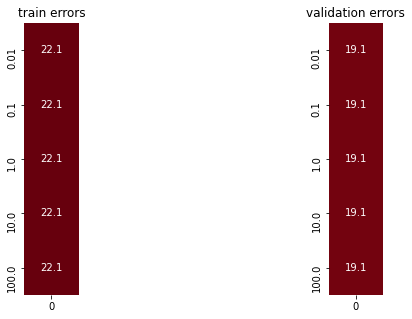

In [62]:
#Trực quan hoá dữ liệu
train_errs_df = pd.DataFrame(data=np.array(train_errs1).reshape(len(alphas), -1),
                             index=alphas)
val_errs_df = pd.DataFrame(data=np.array(val_errs1).reshape(len(alphas), -1), 
                           index=alphas)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors');
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); 

#### Mô hìnhTweedieRegressor

In [50]:
model2 =  linear_model.TweedieRegressor(link = 'log')
full_pipeline2 = make_pipeline(col_adderdropper, col_transform, StandardScaler(), model2)

# Thử nghiệm với các giá trị khác nhau của các siêu tham số
# và chọn ra các giá trị tốt nhất
train_errs2 = []
val_errs2 = []
alphas = [0.01, 0.1, 1, 10, 100]
best_val_err = float('inf'); best_alpha = None; 
for alpha in alphas:
    full_pipeline2.set_params(tweedieregressor__alpha=alpha)
    full_pipeline2.fit(train_X_df, train_y_sr)

    train_errs2.append(100 - compute_rr(train_y_sr, full_pipeline.predict(train_X_df), baseline_preds) * 100)
    val_errs2.append(100 - compute_rr(val_y_sr, full_pipeline.predict(val_X_df), baseline_preds) * 100)

    if val_errs2[-1] < best_val_err:
        best_val_err = val_errs2[-1]
        best_alpha = alpha
'Finish!'

'Finish!'

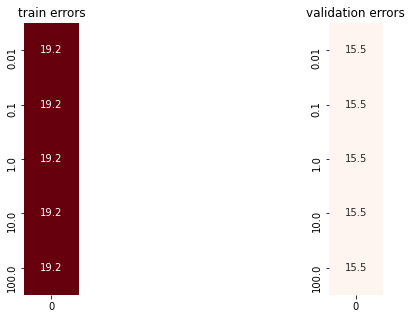

In [51]:
#Trực quan hoá dữ liệu
train_errs_df = pd.DataFrame(data=np.array(train_errs2).reshape(len(alphas), -1),
                             index=alphas)
val_errs_df = pd.DataFrame(data=np.array(val_errs2).reshape(len(alphas), -1), 
                           index=alphas)
min_err = min(min(train_errs), min(val_errs))
max_err = max(max(train_errs), max(val_errs))
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(train_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('train errors');
plt.subplot(1, 2, 2)
sns.heatmap(val_errs_df, vmin=min_err, vmax=max_err, square=True, annot=True, 
            cbar=False, fmt='.1f', cmap='Reds')
plt.title('validation errors'); 

### Đánh giá mô hình tìm được